In [10]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os,sys
font = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

In [12]:
#d = pd.read_csv("analysis/result_stability.csv",encoding="shift_jis"); title=u"安定性"
d = pd.read_csv("analysis/result_growth.csv",encoding="shift_jis"); title=u"成長性"
print os.getcwd()
#print d
d = d[~pd.isnull(d["truth"])]
chanceRate = 0.
for i in d["truth"].unique():
    m = (d["truth"]==i)
    p =  float(sum(m))/len(m)
    #chanceRate += p**2
    if p>chanceRate: chanceRate=p
print "chanceRate=",chanceRate
isGood = (d["truth"]==d["infer"])
dG  = d[isGood]
dB   = d[~isGood]
print "good Rate = ",len(dG)/float(len(dG)+len(dB))

/Users/ysasaki/Documents/102Private/101Quick/release/v3
chanceRate= 0.617808219178
good Rate =  0.608219178082


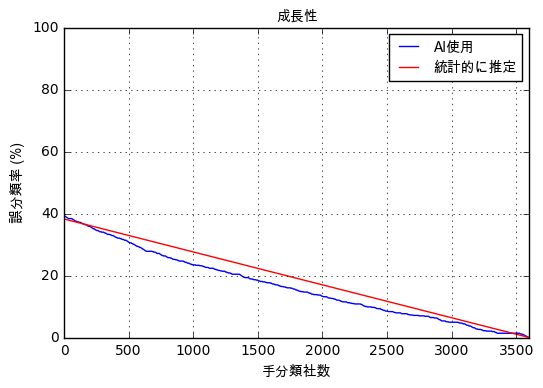

In [8]:
#dGB = (d["inferVal2"]-d["inferVal1"])/(d["inferVal2"]+d["inferVal1"])
dGB = d["confidence"]
dGG = (d["truth"]==d["infer"])
dBB = (d["truth"]!=d["infer"])

dBBsorted = dBB[np.argsort(dGB)]
dBBcumm = np.cumsum(dBB[np.argsort(dGB)])
dBBprob = np.max(dBBcumm) - dBBcumm
dBBprob = np.array(dBBprob)

Total = 3600
x1 = np.linspace(0,dBBprob.shape[0]-1,dBBprob.shape[0],dtype=np.float32)
plt.plot(x1/len(x1)*Total,dBBprob/float(dBBprob.shape[0])*100.,label=u"AI使用",color="blue")
x2 = np.linspace(0,Total-1,Total,dtype=np.float32)
plt.plot(x2,(1.-x2 / Total)* (1.-chanceRate)*100.,label=u"統計的に推定",color="red")
plt.ylim(0,100)
plt.xlim(0,3600)
plt.title(title, fontproperties=font)
plt.xlabel(u"手分類社数", fontproperties=font)
plt.ylabel(u"誤分類率 (%)", fontproperties=font)
plt.grid()
plt.legend(prop=font)
plt.show()

chanceRate= 0.441907651244
good Rate =  0.614206128134


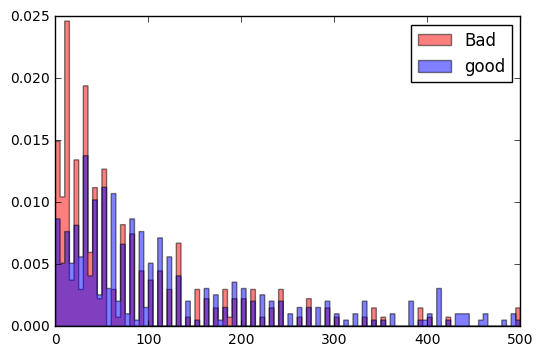

In [186]:
myrange = (0,500)
nbins = 100
hB = plt.hist(dB["inferVal1"]-dB["inferVal2"],range=myrange,bins=nbins,label="Bad",alpha=0.5,color="red",normed=True,histtype="stepfilled")
hG = plt.hist(dG["inferVal1"]-dG["inferVal2"],range=myrange,bins=nbins,label="good",alpha=0.5,color="blue",normed=True,histtype="stepfilled")
plt.legend()

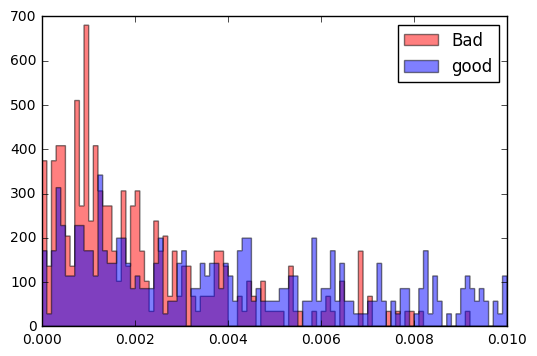

In [166]:
myrange = (0.00,+0.01)
nbins = 100
dB2 = (dB["inferVal2"]-dB["inferVal1"])/(dB["inferVal2"]+dB["inferVal1"])
dG2 = (dG["inferVal2"]-dG["inferVal1"])/(dG["inferVal2"]+dG["inferVal1"])
hB2 = plt.hist(dB2,range=myrange,bins=nbins,label="Bad",alpha=0.5,color="red",normed=True,histtype="stepfilled",cumulative=0)
hG2 = plt.hist(dG2,range=myrange,bins=nbins,label="good",alpha=0.5,color="blue",normed=True,histtype="stepfilled",cumulative=0)
plt.legend()

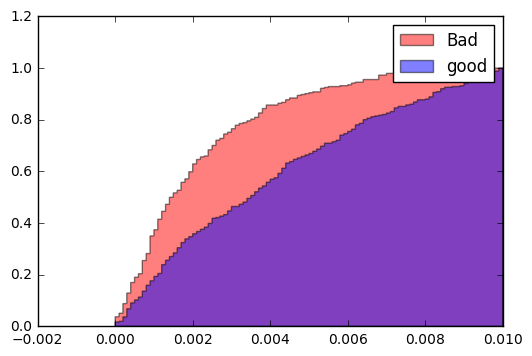

In [167]:
myrange2=(-1e-10,0.01)
hB2 = plt.hist(dB2,range=myrange2,bins=nbins,label="Bad",alpha=0.5,color="red",normed=1,histtype="stepfilled",cumulative=1)
hG2 = plt.hist(dG2,range=myrange2,bins=nbins,label="good",alpha=0.5,color="blue",normed=1,histtype="stepfilled",cumulative=1)
plt.legend()
plt.show()